<a href="https://colab.research.google.com/github/vandrearczyk/isc-summer-school/blob/main/example_deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=a01dd20566df6fef5ac68f0e7a0e4e55ba5b2b8cc6056f152984ec4447c2b7bb
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
from deepface import DeepFace
from PIL import Image, ImageDraw
import requests
import numpy as np
import matplotlib.pyplot as plt

24-08-12 07:13:38 - Directory /root/.deepface created
24-08-12 07:13:38 - Directory /root/.deepface/weights created


Load images from URLs

In [ ]:
url1 = "https://media.licdn.com/dms/image/D4E03AQG6L0xtF9DFIA/profile-displayphoto-shrink_200_200/0/1697533028637?e=2147483647&v=beta&t=XM0yh5ng5PEzhMSdJkVMkQ3tP9MmC63wP5CP1hqFXZg"
url2 = "https://d35r1ltz73o8oz.cloudfront.net/portal/rushes/w6Cg7mwy8Y6VzbEQPFGh8G/snapshots/snapshot0_original.jpg"
url3 = "https://walliser-zeitung.ch/wp-content/uploads/2023/04/Bildschirmfoto-vom-2023-04-04-05-43-01.png"

im1 = Image.open(requests.get(url1, stream=True).raw)
im2 = Image.open(requests.get(url2, stream=True).raw)
im3 = Image.open(requests.get(url3, stream=True).raw)



Plot images

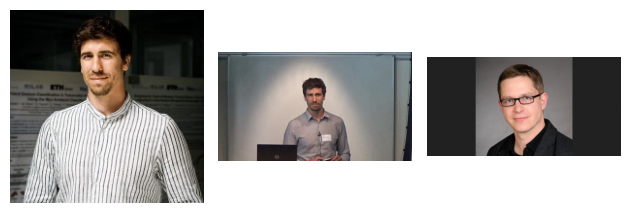

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3)

axs[0].imshow(im1)
axs[0].axis('off')

axs[1].imshow(im2)
axs[1].axis('off')

axs[2].imshow(im3)
axs[2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Run deepface to identify using a ref image and 2 test images

In [ ]:
verification = DeepFace.verify(np.array(im1),np.array(im2), model_name = 'Facenet')
print(verification)


24-08-12 07:13:52 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 58.8MB/s]


{'verified': True, 'distance': 0.17070271995688713, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 62, 'y': 26, 'w': 57, 'h': 57, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 556, 'y': 223, 'w': 160, 'h': 160, 'left_eye': (656, 283), 'right_eye': (608, 286)}}, 'time': 16.79}


In [ ]:
verification = DeepFace.verify(np.array(im1),np.array(im3), model_name = 'Facenet')
print(verification)

{'verified': False, 'distance': 1.1286774799967938, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 62, 'y': 26, 'w': 57, 'h': 57, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 491, 'y': 179, 'w': 390, 'h': 390, 'left_eye': (741, 310), 'right_eye': (607, 331)}}, 'time': 1.6}


Analyze the face (age, gender, emotion ...)

In [ ]:
analysis = DeepFace.analyze(np.array(im1), actions = ["age", "gender", "emotion", "race"])
print(f"\nx{analysis[0]['age']}, {analysis[0]['dominant_gender']}, {analysis[0]['dominant_emotion']}, {analysis[0]['dominant_race']}")


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

24-08-12 07:14:03 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:06, 82.4MB/s]
  5%|▌         | 27.3M/539M [00:00<00:04, 123MB/s] 
  8%|▊         | 42.5M/539M [00:00<00:04, 120MB/s]
 11%|█▏        | 60.8M/539M [00:00<00:03, 142MB/s]
 14%|█▍        | 75.5M/539M [00:00<00:03, 128MB/s]
 17%|█▋        | 91.2M/539M [00:00<00:03, 136MB/s]
 20%|█▉        | 105M/539M [00:00<00:03, 127MB/s] 
 22%|██▏       | 118M/539M [00:00<00:03, 126MB/s]
 25%|██▍       | 133M/539M [00:01<00:03, 131MB/s]
 27%|██▋       | 147M/539M [00:01<00:03, 125MB/s]
 30%|██▉       | 160M/539M [00:01<00:03, 112MB/s]
 32%|███▏      | 173M/539M [00:01<00:03, 117MB/s]
 35%|███▍      | 188M/539M [00:01<00:02, 126MB/s]
 38%|███▊      | 204M/539M [00:01<00:02, 134MB/s]
 41%|████      | 221M/539M [00:01<00:02, 138MB/s]
 44%|████▎     | 235M/539M [00:01<00:02

24-08-12 07:14:17 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:06, 86.7MB/s]
  5%|▌         | 27.3M/537M [00:00<00:04, 126MB/s] 
  8%|▊         | 42.5M/537M [00:00<00:04, 123MB/s]
 10%|█         | 55.1M/537M [00:00<00:05, 94.5MB/s]
 14%|█▍        | 73.9M/537M [00:00<00:04, 105MB/s] 
 16%|█▌        | 87.0M/537M [00:00<00:04, 112MB/s]
 19%|█▉        | 101M/537M [00:00<00:03, 120MB/s] 
 22%|██▏       | 116M/537M [00:01<00:03, 113MB/s]
 25%|██▍       | 133M/537M [00:01<00:03, 127MB/s]
 27%|██▋       | 147M/537M [00:01<00:03, 125MB/s]
 30%|██▉       | 160M/537M [00:01<00:03, 101MB/s]
 33%|███▎      | 179M/537M [00:01<00:03, 109MB/s]
 37%|███▋      | 197M/537M [00:01<00:02, 125MB/s]
 39%|███▉      | 210M/537M [00:01<00:02, 117MB/s]
 43%|████▎     | 231M/537M [00:01<00:02, 125MB/s]
 46%|████▌     | 247M/537M [00:

24-08-12 07:14:25 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
 18%|█▊        | 1.05M/5.98M [00:00<00:00, 5.34MB/s]
 35%|███▌      | 2.10M/5.98M [00:00<00:01, 2.67MB/s]
 44%|████▍     | 2.62M/5.98M [00:01<00:01, 2.39MB/s]
 53%|█████▎    | 3.15M/5.98M [00:01<00:01, 2.26MB/s]
100%|██████████| 5.98M/5.98M [00:01<00:00, 3.78MB/s]
Action: race:  75%|███████▌  | 3/4 [00:26<00:07,  7.42s/it]   

24-08-12 07:14:29 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:06, 82.2MB/s]
  6%|▌         | 29.9M/537M [00:00<00:03, 137MB/s] 
  8%|▊         | 44.6M/537M [00:00<00:03, 124MB/s]
 12%|█▏        | 62.9M/537M [00:00<00:03, 145MB/s]
 15%|█▍        | 78.1M/537M [00:00<00:03, 132MB/s]
 17%|█▋        | 92.3M/537M [00:00<00:04, 99.0MB/s]
 20%|█▉        | 105M/537M [00:00<00:04, 105MB/s]  
 22%|██▏       | 117M/537M [00:01<00:03, 108MB/s]
 25%|██▌       | 136M/537M [00:01<00:03, 129MB/s]
 28%|██▊       | 150M/537M [00:01<00:03, 122MB/s]
 31%|███▏      | 168M/537M [00:01<00:02, 125MB/s]
 35%|███▌      | 188M/537M [00:01<00:02, 144MB/s]
 38%|███▊      | 203M/537M [00:01<00:02, 132MB/s]
 41%|████      | 221M/537M [00:01<00:02, 131MB/s]
 45%|████▍     | 239M/537M [00:01<00:02, 141MB/s]
 47%|████▋     | 254M/537


x27, Man, neutral, middle eastern


Detect and count faces can also be done with functions wrapped in deepface (also yolo if installed)

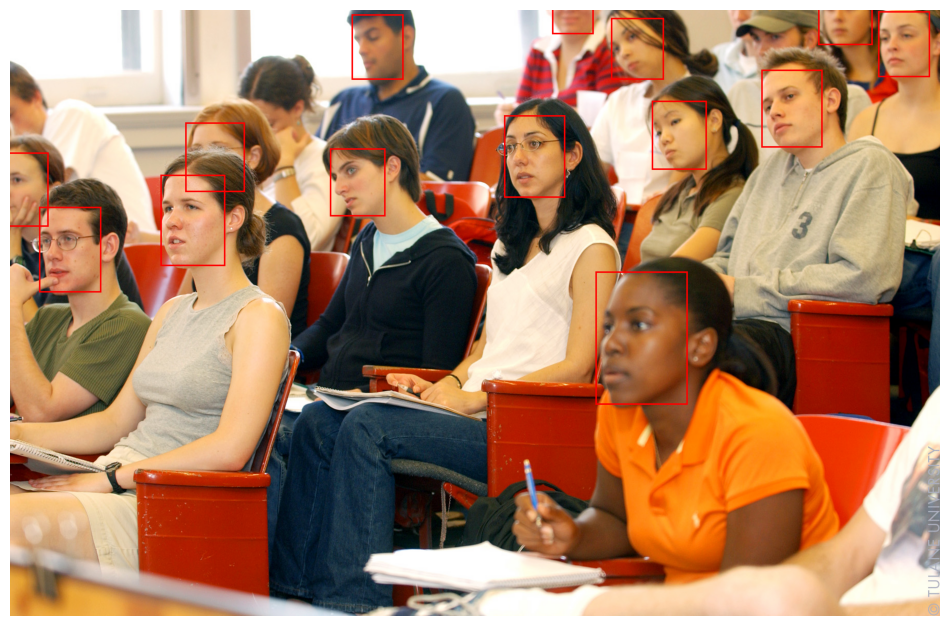

In [ ]:
import cv2

# url4 = "https://pro.etudiant.lefigaro.fr/wp-content/uploads/2023/02/TAILLE-ARTICLE-3.png"
url4 = "https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/1110/2016/03/16214526/3618969705_9e34ea2ac3_o.jpg"

im4 = Image.open(requests.get(url4, stream=True).raw)

# Convert PIL image to a NumPy array for OpenCV compatibility
im4_np = np.array(im4)[...,:3]

# Detect faces using DeepFace with the RetinaFace detector
detected_faces = DeepFace.extract_faces(im4_np, detector_backend='retinaface')

# Convert back to PIL Image to draw rectangles
im4_draw = Image.fromarray(im4_np)
draw = ImageDraw.Draw(im4_draw)

# Draw rectangles around detected faces
for face in detected_faces:
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    draw.rectangle(((x, y), (x+w, y+h)), outline="red", width=3)

# Plot the original image with rectangles
plt.figure(figsize=(12, 8))
plt.imshow(im4_draw)
plt.axis('off')
plt.show()

Real time video analysis -> try it out on your machine.

In [1]:
# Real time video analysis (run from laptop)
# from deepface import DeepFace
# db_path = "/home/vincent/repos/isc-data-processing-visualization/data/person_recognition/database_folders_s"
# DeepFace.stream(db_path = db_path)